In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


DATA CLEANING ND VISUALIZATION


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.dropna(subset=['age', 'embarked'], inplace=True)  # Example cleanup
df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17268\375390773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deck'].fillna('Unknown', inplace=True)


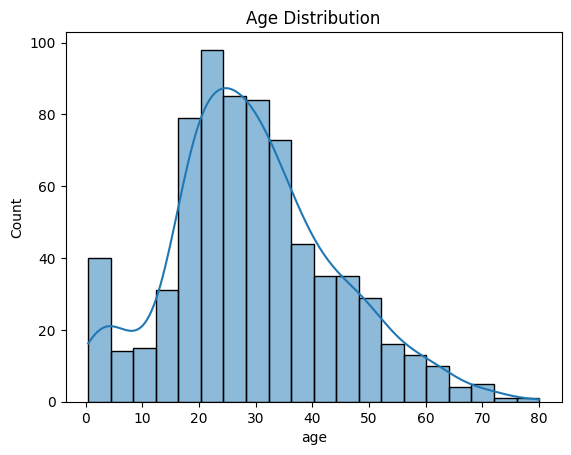

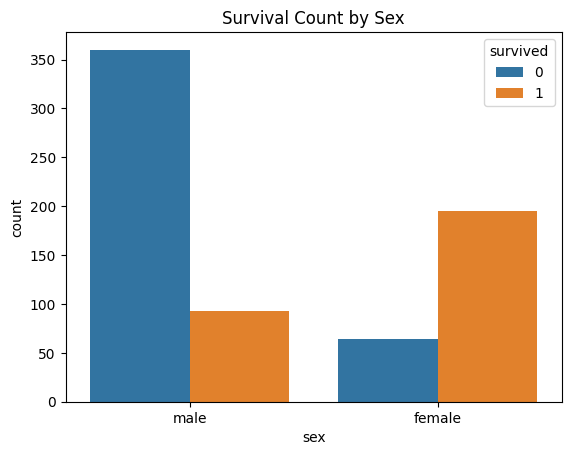

In [8]:
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.savefig('age_distribution.png')
plt.show()
# Survival by sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.savefig('survival_by_sex.png')
plt.show()



GENERATE INSIGHTS :CORRELATIONS , OUTLIERS

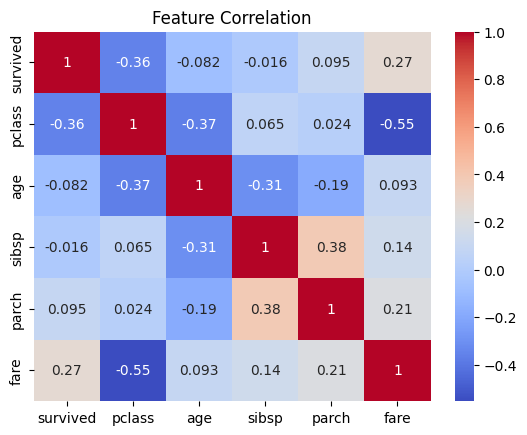

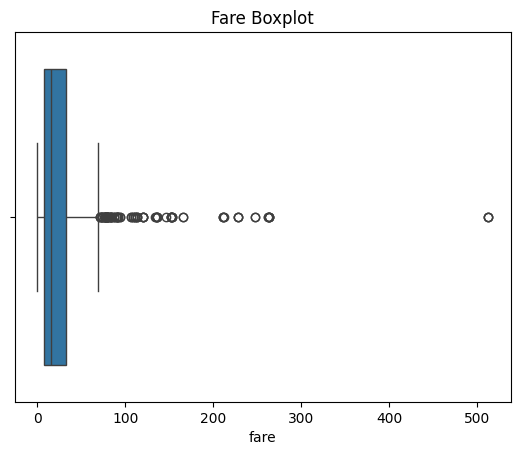

In [9]:
# Correlation heatmap
import numpy as np

numeric_df = df.select_dtypes(include=np.number)
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('correlation_heatmap.png')
plt.show()

# Boxplot for outlier detection
sns.boxplot(x=df['fare'])
plt.title('Fare Boxplot')
plt.savefig('fare_boxplot.png')
plt.show()
